In [10]:
!pip freeze > requirements.txt

****
# Задание 9.1
Анализ статуса клиентов (ушедшие / лояльные)

C:\Users\nitys\AppData\Local\Temp\ipykernel_28932\2548750279.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


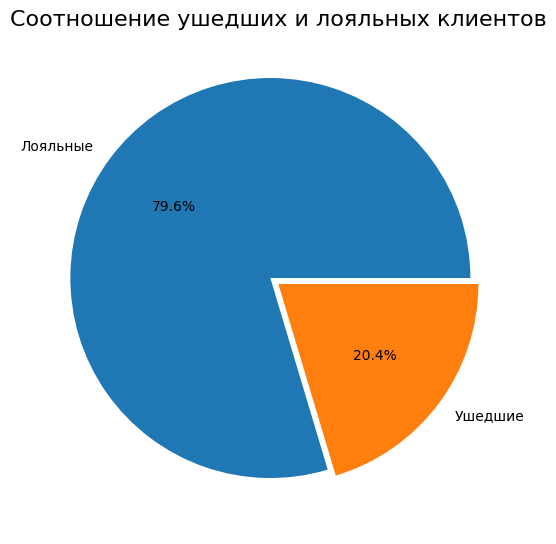

In [1]:
# TASK 9-1

"""Осуществляется построение круговой диаграммы
по статусу клиентов (ушедшие / лояльные). 
"""

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

churn_data = pd.read_csv('data/churn.csv')


# Приведем данные по статусу клиентов к "читаемому" варианту и сделаем признак категориальным для экономии памяти

churn_data['Exited'] = churn_data['Exited'].apply(lambda x: 'Лояльные' if x == 0 else 'Ушедшие')
churn_data['Exited'] = churn_data['Exited'].astype('category')

loyality = churn_data['Exited'].value_counts()


# Построрим диаграмму

fig = plt.figure(figsize=(5,5))
ex_loayal = fig.add_axes( [0, 0, 1, 1] )
ex_loayal.pie(
    loyality,
    labels = loyality.index,
    autopct='%.1f%%',
    explode = [0.05, 0]
    )

ex_loayal.set_title('Соотношение ушедших и лояльных клиентов', fontsize=16)

fig.show()

**Вывод по заданию 9.1**

По результатам анализа соотношения ушедших и лояльных клиентов банка можно сделать вывод, что за время наблюдения банк потеря пятую часть пришедших клиентов. 

****
# Задание 9.2
Анализ клиентских балансов

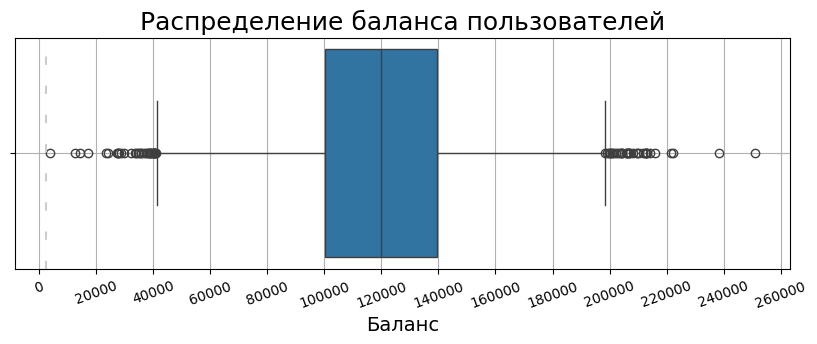

In [1]:
# TASK 9-2

"""Осуществляется построение коробчатой диаграммы
распределения балансов пользователей. 

Для корректности балансов осуществлена проверка исходного DF
на подтверждение "один пользователь - один баланс"
churn_data['CustomerId'].nunique() == churn_data[
'CustomerId'].value_counts().sum()
# True
"""


import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns

churn_data = pd.read_csv('data/churn.csv')


# Создадим DF с пользователями с балансом более 2500

balance_2500 = churn_data[churn_data['Balance'] > 2500]
fig = plt.figure(figsize=(10, 3))
boxplot = sns.boxplot(
    data=balance_2500,
    # y='country',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса пользователей', fontsize = 18);
boxplot.set_xlabel('Баланс', fontsize = 14);
boxplot.grid()


# Зададим бОльшее кол-во меток по оси X (ось баланса) в диапазоне 0-260.000 с шагом 20.000

boxplot.set(xticks=list(range(0, 261000, 20000)))
plt.xticks(rotation=20, fontsize=10)

# Добавим вспомогательную линию для баланса 2500, чтобы убедиться, что в нашу 
    # выборку не попали пользователи с балансом менее или равному 2500
    
boxplot.axvline(2500, color=".8", dashes=(4, 10))



**Выводы по заданию 9.2**

Из полученной коробчатой диаграммы можно сделать следующие выводы: 
1) Медианное значение баланса клиентов составляет 120.000 

2) Баланс половины пользователей находится в диапазоне 100.000 - 140.000

3) Наблюдается ряд аномалий (выбросов), но они вполне объясняются своей естественной природой, незначительная часть клиентов имеет весомые накопления, и незначительная часть имеет скромные, относительно средних показателей, накоплений 


****
# Задание 9.3
Анализ баланса клиентов в зависимости от их статуса

Text(0.5, 0, 'Баланс')

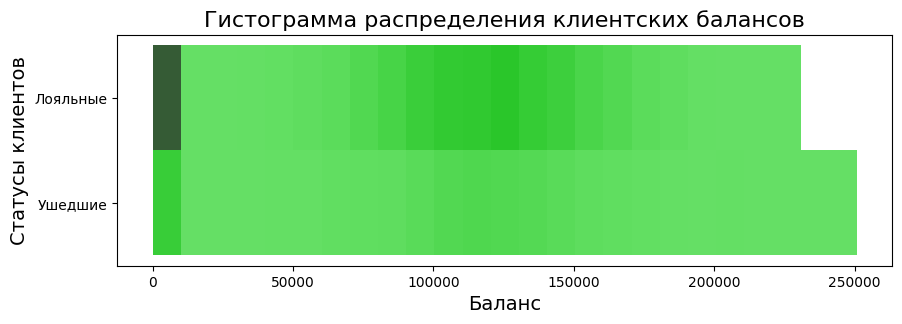

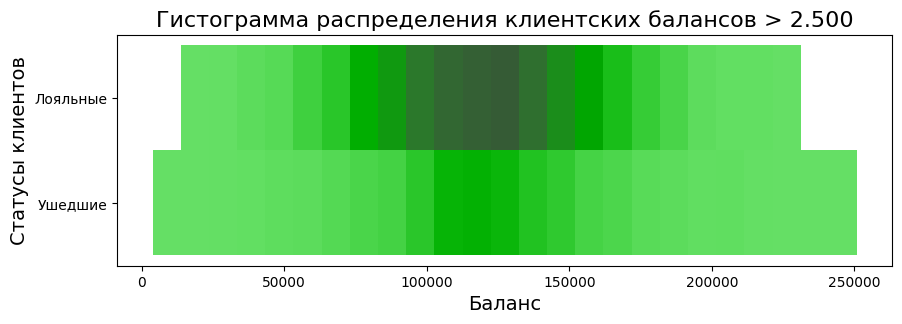

In [1]:

# TASK 9-3

"""Построение зависимости баланса клиентов 
в разрезе признака оттока (актиный/ушедший клиент)
"""


import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns

churn_data = pd.read_csv('data/churn.csv')


# Приведем данные по статусу клиентов к "читаемому" варианту и сделаем признак категориальным для экономии памяти

churn_data['Exited'] = churn_data['Exited'].apply(
    lambda x: 'Лояльные' if x == 0 else 'Ушедшие'
    )
churn_data['Exited'] = churn_data['Exited'].astype('category')

balance_2500 = churn_data[churn_data['Balance'] > 2500]


# Построение гистаграммы балансов клиентов 

fig, axes = plt.subplots(figsize=(10, 3))
axes.set_title('Гистограмма распределения клиентских балансов', fontsize=16)

hist_status_balance = sns.histplot(
    data=churn_data,
    x='Balance',
    y='Exited',
    bins=25,
    color='green',
);
hist_status_balance.set_ylabel('Статусы клиентов', fontsize = 14)
hist_status_balance.set_xlabel('Баланс', fontsize = 14)


# Построение гистаграммы балансов клиентов с накоплениями более 2.500 

fig, axes_2500 = plt.subplots(figsize=(10, 3))
axes_2500.set_title('Гистограмма распределения клиентских балансов > 2.500', fontsize=16)

hist_status_balance_2500 = sns.histplot(
    data=balance_2500,
    x='Balance',
    y='Exited',
    bins=25,
    color='green',
);
hist_status_balance_2500.set_ylabel('Статусы клиентов', fontsize = 14)
hist_status_balance_2500.set_xlabel('Баланс', fontsize = 14)


**Выводы по заданию 9.3**

Для более детальной аналитики было принято решение построить две диаграммы для двух DataFrame. Первый DF - все данные за период наблюдения, второй DF - выборка с первого DF по балансу более 2500. 
Причиной, вызвавшей данную необходимость, является большое количество клиентов с нулевым/около нулевым балансом, что делает картину по остальным балансам не столь наглядной. 

Выводы:  
1) Наибольший отток клиентов наблюдается в группе околонулевых накоплений. Это может быть связано с разными факторами и сценариями: 
    * Данные клиенты планировали использовать продукты банка для повседневных расходов и остались чем-то недовольны, например, программой лояльности банка, от чего и ушли 
    
    * Данные клиенты появились в результате рекламной кампании банка с выгодными условиями продуктов, и по окончании промо-периода, клиенты прекратили пользоваться услугами 
     
2) Вторая группа оттока, отличительная на фоне отсутствия лояльных клиентов в этом сегменте, это клиенты с балансами, превышающими 225.000. Причинами оттока этой группы могут быть:
    * Баланс клиентов этой группы накапливался в этом банке (для ответа на этот вопрос требуется дополнительная аналитика с динамикой ДС по счету), и, по мере достижения больших размеров, клиент: 
        - либо осуществляет перенос ДС в другой банк, тогда это проблема для банка и надо либо проработать вопрос программы лояльности, либо изучить рейтинг доверия к банку и при необходимости произвести корректирующие мероприятия;     
        - либо совершает крупную покупку. В данном случае тоже неплохо было бы изучить вопрос, т.к. клиенту возможно предлагать такие продукты банка как страховые, кредитные и пр. 

    * Банковский продукт был использован как средство расчета (т.е. была размещена крупная сумма денежных средств, которая в дальнейшем была переведена условному продавцу)

3) Третья группа оттока - клиенты с балансами, находящимися в диапазонах чуть больших, чем 1ый и 3ий квартиль (из данных коробчатой диаграммы). Здесь требуется пристальное внимание банка, т.к. эта группа клиентов наиболее "денежноемкая". Вероятнее всего данную категорию не устраивают условия по накопительным продуктам (вкладам). Возможно, банку стоит изучить что именно не устраивает, это может быть и процентная ставка, а может быть просто сроки размещения вкладов (если они сильно большие, клиентов это может не устраивать). Так же, исходя из этого предположения, причиной оттока могут быть окончания сроков размещения накопительных вкладов (если они были размещены скачкообразно в результате, например, промо-акции).    

Дополнительно:
Так же стоит отметить, что большое количество лояльных клиентов банка имеют нулевые/оконулевые балансы, что говорит нам о том, что вероятно используются такие продукты банка как дебетовые карты для повседневных расходов. При дальнейшей аналитике, например, связав с кредитным рейтингом данной группы, можно понять, могут ли у них иметься свободные денежные средства, которые можно привлечь в банк, т.к. это достаточно большая группа клиентов.

Хорошей стороной стоит отметить большую долю лояльных клиентов в зоне "коробки", что является хорошим основанием для стабильности финансовой системы банка. 


****
# Задание 9.4
Анализ возраста клиентов в зависимости от их статуса

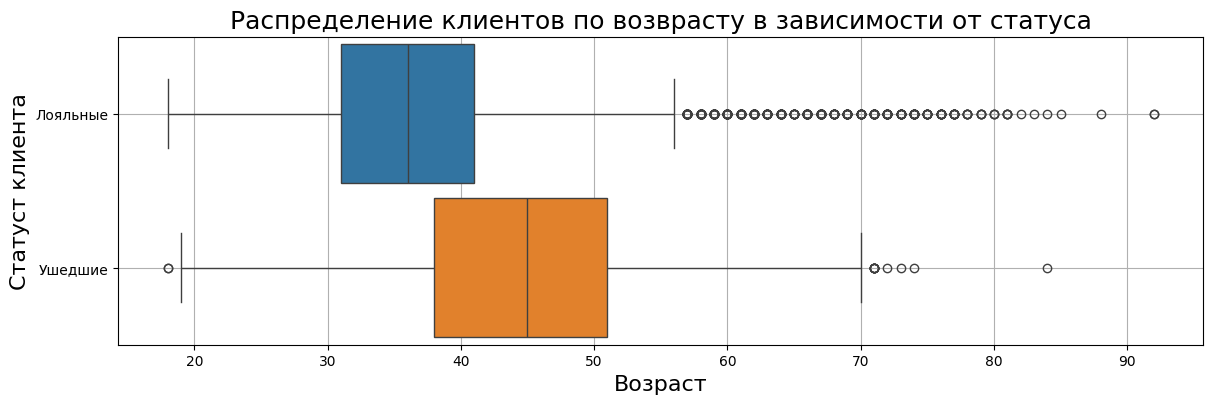

In [1]:

# TASK 9-4

"""Построение коробчатых диаграмм
по распределению возраста в разрезе статуса
клиента (ушедший / лояльный)
"""


import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns

churn_data = pd.read_csv('data/churn.csv')


# Приведем данные по статусу клиентов к "читаемому" варианту и сделаем признак категориальным для экономии памяти

churn_data['Exited'] = churn_data['Exited'].apply(
    lambda x: 'Лояльные' if x == 0 else 'Ушедшие'
    )
churn_data['Exited'] = churn_data['Exited'].astype('category')


# Построем круговую диаграмму

fig = plt.figure(figsize=(14,4))

box_age_status = sns.boxplot(
    data = churn_data,
    y = 'Exited',
    x = 'Age',
    orient='h',
    width = 0.9,
    hue='Exited'
    )

box_age_status.set_title('Распределение клиентов по возврасту в зависимости от статуса', fontsize = 18)
box_age_status.set_ylabel('Статуст клиента', fontsize = 16)
box_age_status.set_xlabel('Возраст', fontsize = 16)
box_age_status.grid()

**Выводы по заданию 9.4**

1) Потенциальных выбросов больше в лояльной группе клиентов. Причем выбросы находятся в возрастной группе близкой либо равной пенсионному возрасту. Причиной этому может являться то, что клиенты данного возраста приходят в банк по советам своих младших родственников. Т.к. общая картина распределения возрастов говорит об обратной ситуации (подробнее далее).

2) Общая картина такова, что бОльшая часть лояльных клиентов имеет возраст от 31 до 41 года, а бОльшая часть ушедших клиентов имеет возраст от 38 до 51 года. Таким образом, можно судить, что банк является "более молодежным" и, скорее всего, более высокотехнологичным. 
В связи с этим требуется изучить вопрос, что не нравится клиентам возраста 38-51. Возможно, усложненный мобильный банкинг, или "Молодежный" стиль банка, что, возможно, воспринимается группой как нечто несерьезное и не отражает их стереотип о фин.организации.   


****
# Задание 9.5
Анализ взаимосвязи кредитного рейтинга и предполагаемой зарплаты по признаку статуса клиента

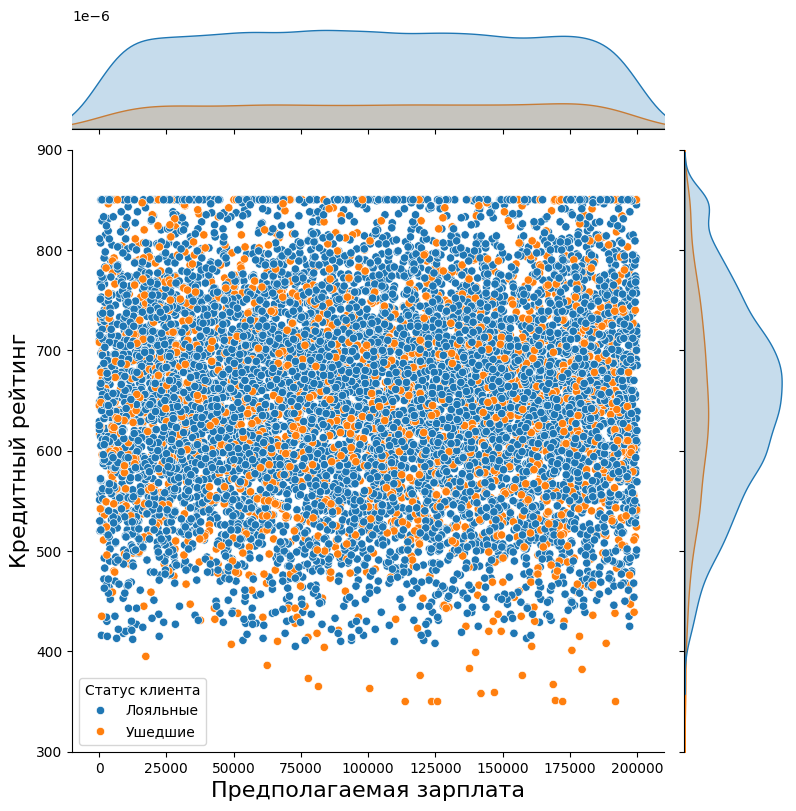

In [1]:

# TASK 9-5

"""Построение jountplot для определения взаимосвязи 
кредитного рейтинга и предполагаемой зарплаты
по признаку статуса клиента 
"""


import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns

churn_data = pd.read_csv('data/churn.csv')


# Приведем данные по статусу клиентов к "читаемому" варианту и сделаем признак категориальным для экономии памяти

churn_data['Exited'] = churn_data['Exited'].apply(
    lambda x: 'Лояльные' if x == 0 else 'Ушедшие'
    )
churn_data['Exited'] = churn_data['Exited'].astype('category')


# Построение jountplot

joint_age_status = sns.jointplot(
    data = churn_data,
    y = 'CreditScore',
    x = 'EstimatedSalary',
    hue='Exited',
    xlim = (-10000, 210000),
    ylim = (300, 900),
    height=8,
    # kind='hist',
    
    )

joint_age_status.set_axis_labels('Предполагаемая зарплата', 'Кредитный рейтинг', fontsize=16)
plt.legend(title='Статус клиента')


**Выводы по заданию 9.5**

При выборе типа диаграммы решено остановиться на совмещенной диаграмме рассеяния и гистограммы 

При анализе графика мы можем видеть более-менее равномерное распределение признаков, разве что среди ушедших клиентов есть люди с очень низким кредитным рейтингом, но их очень малое количество. 
Среди лояльных клиентов бОльшая часть имеет средний кредитный рейтинг, но что касается признака предполагаемой зарплаты, наблюдается довольно большое плато, что говорит о равномерности распределения данного признака по числу клиентов. 

Гистограммы предполагаемых зарплат и гистограммы кредитных рейтингов идентичны по признаку статуса клиента, отличаются только количеством клиентов. 

Итого, можно сделать вывод, что несмотря на незначительные аномалии, в целом взаимосвязей между признаками, на которые стоило бы обратить внимание, нет. 

****
# Задание 9.6
Анализ ушедших клиентов по гендерному признаку

C:\Users\nitys\AppData\Local\Temp\ipykernel_24428\1884226607.py:41: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


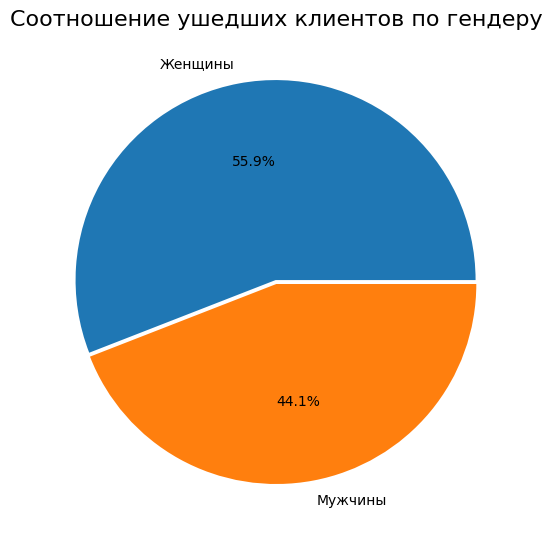

In [1]:
# TASK 9-6

"""Построение круговой диаграмыы, 
отображающей гендерный признак 
в группе бывших клиентов
"""


import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns

churn_data = pd.read_csv('data/churn.csv')


# Переименуем данные столбца Gender по-русски, подготовим данные для диаграммы

churn_data['Gender'] = churn_data['Gender'].apply(
    lambda x: 'Женщины' if x == 'Female' else 'Мужчины'
    )

data_pie = churn_data[churn_data['Exited'] == 1]
data_pie = data_pie['Gender'].value_counts()


# Построим круговую диаграмму распределения по гендеру

fig = plt.figure(figsize=(5,5))

ex_gender_ratio = fig.add_axes( [0, 0, 1, 1] )
ex_gender_ratio.pie(
    data_pie,
    labels = data_pie.index,
    autopct='%.1f%%',
    explode = [0.02, 0],
    )
ex_gender_ratio.set_title('Соотношение ушедших клиентов по гендеру', fontsize = 16)

fig.show()

**Вывод по заданию 9.6**

Из построенной круговой диаграммы мы можем наблюдать, что среди ушедших клиентов больше женщин. Хотя, это преобладание незначительно, вследствие чего, можно предположить, что гендерный признак не оказывает существенного влияния на решение клиента покинуть банк. 

****
# Задание 9-7
Анализ оттока клиентов в зависимости от числа приобретенных у банка продуктов

C:\Users\nitys\AppData\Local\Temp\ipykernel_31928\2224512547.py:41: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


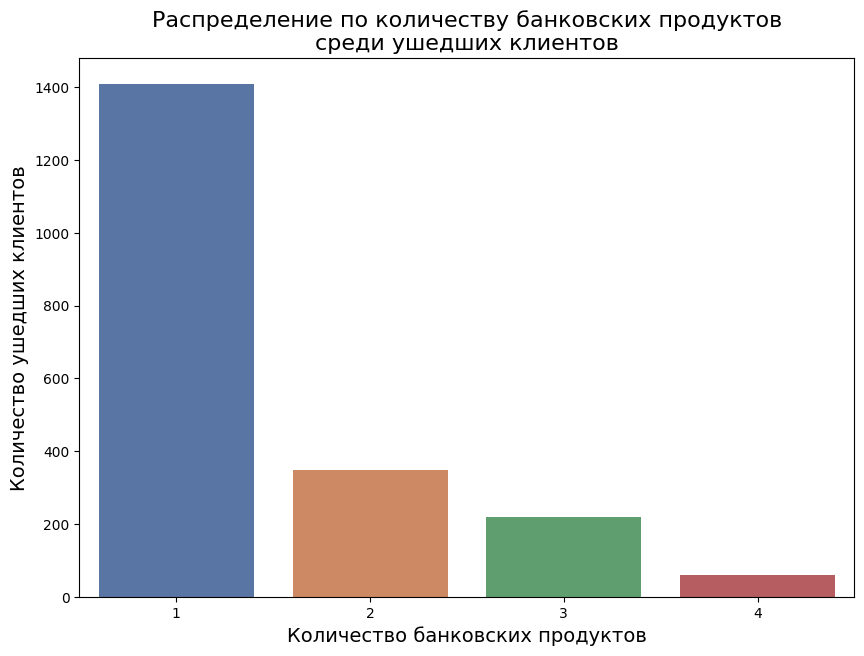

In [1]:
# TASK 9-7

"""Построение круговой диаграмыы, 
отображающей гендерный признак 
в группе бывших клиентов
"""


import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns

churn_data = pd.read_csv('data/churn.csv')


# Подготовим новый DF, с которого будем строить диаграмму

data_exited = churn_data[ churn_data['Exited'] == 1 ]
data_ex_num_prod = pd.DataFrame(data_exited.groupby('NumOfProducts')['Exited'].value_counts())

fig = plt.figure(figsize=(10, 7))


# Троим многоуровневую столбчатую диаграмму, наполняем пояснениями

barplot = sns.barplot(
    data=data_ex_num_prod,
    x='NumOfProducts',
    y='count',
    hue='NumOfProducts',
    palette="deep",
    legend=None
    )

barplot.set_title('Распределение по количеству банковских продуктов' + '\n' + 'среди ушедших клиентов', fontsize=16)
barplot.set_xlabel('Количество банковских продуктов', fontsize = 14)
barplot.set_ylabel('Количество ушедших клиентов', fontsize = 14)

fig.show()

**Вывод по заданию 9.7**

Наибольшее количество ушедших клиентов имело всего один банковский продукт. Далее численность групп с количеством продуктов 2, 3, 4 имеет тенденцию к снижению. Наименьшая группа из ушедших имела 4 банковских продукта. 

Это вполне объяснимо и закономерно, лояльные банку клиенты открывают не один продукт. 

Большой отток клиентов с одним банковским продуктом может быть объяснен тем, что, например, это клиенты, пришедшие в банк в результате промо-акций, по окончанию промо-периода, банк они покинули. 
Либо же, клиенты пришли в банк и открыли "на пробу" один продукт, им что-то не понравилось, и они ушли.  

****
# Задание 9.8
Анализ соотношения количества клиентов в разрезе признаков лояльности и активности

C:\Users\nitys\AppData\Local\Temp\ipykernel_16476\2819329362.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_data.groupby('IsActiveMember')['Exited'].value_counts()
C:\Users\nitys\AppData\Local\Temp\ipykernel_16476\2819329362.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


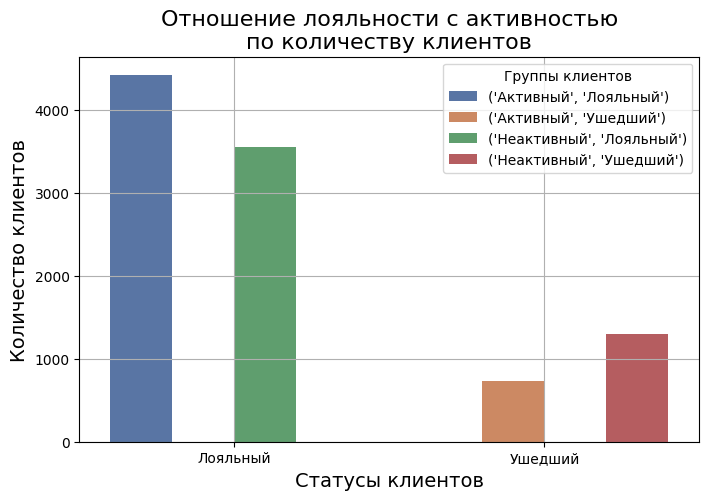

In [1]:
# TASK 9-8

"""Построение многоуровневой столбчатой диаграммы 
по колияеству клиентов в разрезе признаков активности 
и лояльности
"""


import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns

churn_data = pd.read_csv('data/churn.csv')


# Подготовим данные к формированию DF, с которого будует строится диаграмма

churn_data['IsActiveMember'] = churn_data['IsActiveMember'].apply(
    lambda x: 'Активный' if x == 1 else 'Неактивный'
    )
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].astype('category')

churn_data['Exited'] = churn_data['Exited'].apply(
    lambda x: 'Ушедший' if x == 1 else 'Лояльный'
    )
churn_data['Exited'] = churn_data['Exited'].astype('category')


# Создаем DF для построения диаграммы и строим ее

data_status_activity = pd.DataFrame(
    churn_data.groupby('IsActiveMember')['Exited'].value_counts()
    )

fig = plt.figure(figsize=(8, 5))

barplot = sns.barplot(
    data=data_status_activity,
    x='Exited',
    y='count',
    hue=data_status_activity.index,
    palette="deep",
    )

barplot.set_title(('Отношение лояльности с активностью' + '\n' 'по количеству клиентов'), fontsize=16)
barplot.set_xlabel('Статусы клиентов', fontsize = 14)
barplot.set_ylabel('Количество клиентов', fontsize = 14)
barplot.legend(title = 'Группы клиентов')
barplot.grid()

fig.show()


**Выводы по заданию 9.8**

Исходя из построенной многоуровневой столбчатой диаграммы, где отображена взаимосвязь статусов клиентов по типу лояльный/ушедший и активный/неактивный к количеству клиентов, можно сделать следующий вывод: 

Количество активных клиентов среди лояльных выше, чем среди ушедших. Т.е. уходят из банка больше не активных клиентов, чем активных. Численность неактивных ушедших в два раза превышает численность активных ушедших. А среди лояльных клиентов признак активность преобладает. Следовательно, чтобы снизить отток клиентов необходимо стимулировать их активность. 

****
# Задание 9.9
Анализ доли ушедших клиентов по странам

In [1]:
# TASK 9-9

"""Создаем тепловую картограмму для отображения 
доли ушедших клиентов по странам. В ходе выполнения, 
преобразуем исходные данные для формирования DF, 
пригодного для построения графика.

При анализе данных было определено, что регион 
пристуствия банка - Европа, для лучшей читаемости 
при построении картограммы был задан именно этот регион. 

(присутствие на карте мира Фрунзуской Гвианы намерено 
упущено в угоду большей наглядности и читаемости картограммы)
"""


import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns
import plotly
import plotly.express as px

churn_data = pd.read_csv('data/churn.csv')

# Подготовим DF для построения тепловой карты, в ходе подготовки, 
# создаем новый DF как pivottable от предоставленного DF, группируем данные, 
# задаем столбцы и прочее, готовим DF для применимости метода choropleth

choropleth_data = churn_data.pivot_table(
    index = 'Geography',
    columns= 'Exited',
    values='Surname',
    aggfunc=['count']
    )

choropleth_data = choropleth_data.reset_index(names='Страна')

choropleth_data=choropleth_data.droplevel(0, axis=1)
choropleth_data = choropleth_data.rename(
    columns={ '':'Страна', 0:'Действующий клиент', 1:'Ушедший клиент' }
    )


# Вычислим и внесем в DF долю ушедших клиентов

choropleth_data['Доля ушедших клиентов, %'] = (
    choropleth_data['Ушедший клиент'] / 
    ( choropleth_data['Действующий клиент'] + choropleth_data['Ушедший клиент'] ))*100


#строим график

fig = px.choropleth(
    data_frame=choropleth_data, 
    locations='Страна', 
    locationmode = "country names", 
    color='Доля ушедших клиентов, %', 
    range_color=[0, 35], 
    title='Доля ушедших клиентов по странам присутствия банка', 
    width=800, 
    height=400, 
    color_continuous_scale='Reds',
    scope='europe',
    projection= 'eckert4' 
    )


#отображаем график

fig.show()


**Выводы по заданию 9.9**

На представленной тепловой картограмме мы видим, что доля ушедших клиентов во Франции и Испании практически идентична, в Германии же этот относительный показатель в два раза выше. На территории Германии каждый третий клиент банка уходит.

Просто по данным о доле ушедших клиентов сложно сделать вывод о причине повышенного ухода клиентов в Германии. Можно только предположить, что, исходя из общего числа клиентов, наибольший процент (половина) - это граждане Франции. Вероятно, банк принадлежит Франции, хоть и осуществляет свою деятельность как международный. Из открытых источников можно найти отличительную особенность в части страхования банковских вкладов. Во Франции она лимитирована, в Германии не лимитирована. Возможно, этот факт смущает клиентов. 

Возможно влияние патриотической составляющей. Экономика Германии занимает первое место в ЕС, возможно, жители Германии не хотят поддерживать банковский сектор соседней Франции, занимающей 2-ое место в рейтинге. 


****
# Задание 9.10
Анализ процента оттока клиентов во взаимосвязи с кредитным рейтингом и периодом лояльности клиента

C:\Users\nitys\AppData\Local\Temp\ipykernel_21020\718257927.py:45: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ratio_credit_tenure_df = churn_data.pivot_table(


Text(0.5, 23.52222222222222, 'Количество лет,\nв течении которых клиент был лояльным')

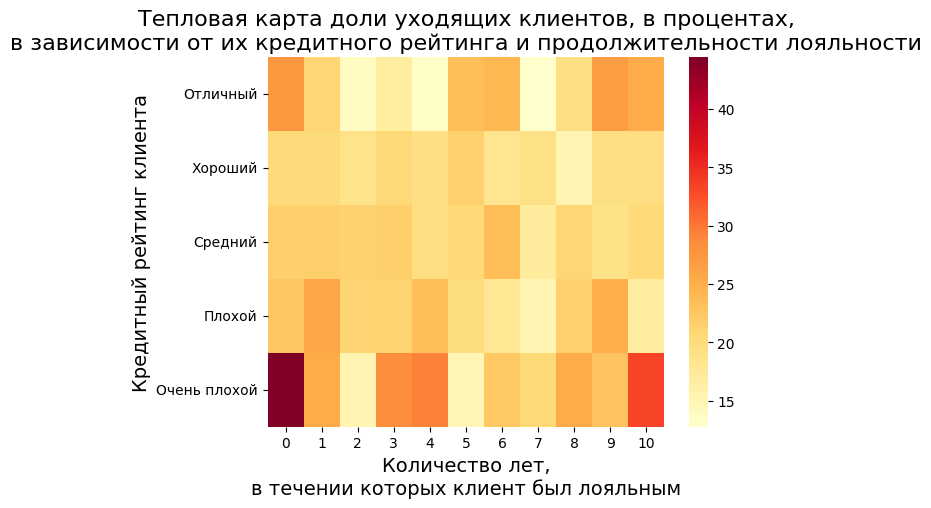

In [2]:
# TASK 9-10 

"""Создаем тепловую карту доли оттока клиентонв
по взаимосвязи кредитного рейтинга и срока лояльности клиента.

В ходе программы, создаем новый DF методом pivot_table, 
с которого в дальнешей строим тепловую карту
"""

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns

churn_data = pd.read_csv('data/churn.csv')

# Функция преобразования количественного показателя кредитного рейтинга в категориальный

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    

# Добавление нового категориального признака кредитоного рейтинга, изменение значений
# столбца лояльности умножением на 100 (для дальнейшего представления в виде процентов)
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
churn_data['CreditScoreCat'] = churn_data['CreditScoreCat'].astype('category')
churn_data['Exited'] = churn_data['Exited'].apply(lambda x: x*100)

# ratio_credit_tenure_df
ratio_credit_tenure_df = churn_data.pivot_table(
    index='CreditScoreCat',
    columns='Tenure',
    values='Exited',
    )

# " Костыль "
# При формировании pivottable произошла сортировка категории кредитного рейтинга по алфавиту
# Сделаем коррективку для отражения верной сортировки
ratio_credit_tenure_df['to_del'] = [1, 3, 2, 4, 5]
ratio_credit_tenure_df = ratio_credit_tenure_df.sort_values(by='to_del')
del ratio_credit_tenure_df['to_del']


# Построим тепловую карту.
# МЕНТОРУ: в задании сказано "карту с аннотацией", если подразумевались аннотации как параметр, 
    #  а не как пояснения, то он закомменчен в коде - annot
    
heatmap = sns.heatmap(
    data=ratio_credit_tenure_df, 
    cmap='YlOrRd',
    # annot = True, 
    yticklabels=['Отличный', 'Хороший', 'Средний', 'Плохой', 'Очень плохой']
    )

heatmap.set_title(('Тепловая карта доли уходящих клиентов, в процентах,' + '\n' 
                   + 'в зависимости от их кредитного рейтинга и продолжительности лояльности'),
                  fontsize=16)

heatmap.set_ylabel('Кредитный рейтинг клиента', 
                   fontsize = 14)
heatmap.set_xlabel(('Количество лет,' + '\n' 'в течении которых клиент был лояльным'), 
                   fontsize = 14)



**Выводы по заданию 9.10**

Наибольший отток клиентов наблюдается в группе с очень плохим кредитным рейтингом и со сроком лояльности меньше года. 
Второй по значимости оттока является группа клиентов со сроком лояльности 10 лет, но так же с очень плохим кредитным рейтингом. 
В целом, отток клиентов в группе очень плохого рейтинга преобладает над другими группами. 

Стоит обратить внимание и на группу клиентов с отличным кредитным рейтингом, в ней так же наблюдаются оттоки, превышающие средние показатели. Причем выделяются в этой группе три волны оттока: клиенты, лояльные меньше года, лояльные 5-6 лет, лояльные 9-10 лет. 

**не ответ на задание, вопрос МЕНТОРУ**

Здравствуйте, могли, бы, пожалуйста, в обратной связи подсказать как быть с сортировкой данных при методе pivot_table. Столкнулся с тем, что сортировка происходит по алфавиту, и не имеет значения в каком порядке шли исходные данные. Для исправления ситуации использовал "костыль". Есть ли какое-то решение? Прочитал много в документации и просто гуглил, но так и не нашел что можно сделать.. 